# **Autoencoder with Keras api**
+ Objective:    
    + Setup an Auto-encoder model for correctly classifying MNIST-Numbered dataset.
    + Extract Latent-space representation of the input for encoding the input image.

# Importing modules

In [2]:
import tensorflow as tf

from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset 

Max_x_train = 255  Max_x_test = 255

After Normalizing:
Max_x_train = 1.0  Max_x_test = 1.0

x_train ==> (60000, 28, 28)  y_train ==> (60000,)
x_test ==> (10000, 28, 28)   y_test ==> (10000,)

Label of (0th) sample ==> (5)
Shape of x_train[0th] ==> ((28, 28))


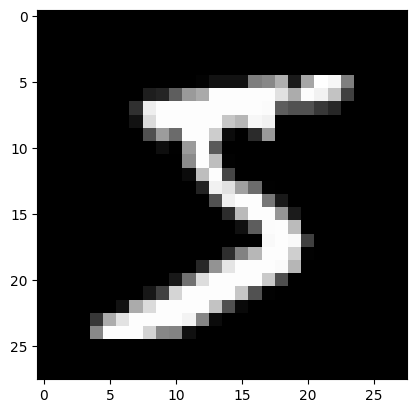

In [13]:
# from tf.keras.datasets import mnist :
# Popular training data set of handwritten number
# The dataset consists of hand-written digits 0-9, usually used for classification
# But we're using this dataset in autoencoders.



(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data();

print("Max_x_train = {}  Max_x_test = {}".format(np.max(x_train),np.max(x_test)));

# Normalizing the samples: by 225
x_train = x_train/255.0;
x_test = x_test/255.0;

print("\nAfter Normalizing:");
print("Max_x_train = {}  Max_x_test = {}".format(np.max(x_train),np.max(x_test)));


#-----------------------------------------------------------------------------------------------------------#

# Understanding the DataSet


print('\nx_train ==> {}  y_train ==> {}'.format(x_train.shape, y_train.shape));
print('x_test ==> {}   y_test ==> {}'.format(x_test.shape, y_test.shape));
# (60k/10k , 28 , 28) : 60k/10k: # of samples/imgs , 28*28 : size of img of each smaple(pixels)
# y_train/test : (60k/10k) : sample labels/img names



### Each sample: 28*28 = 784 values, but most of'em are zeros(at corners) ###
### It's only in small locations where the sample value matters: Hence mnist is very primitive dataset! ###



# visualizing the image and it's label in y_train/test[i] and image in x_train/test[i,:,:]
plt.imshow(x_train[0], cmap='gray');
print('\nLabel of ({}th) sample ==> ({})'.format(0,y_train[0]));
print("Shape of x_{} ==> ({})".format('train[0th]',x_train[0].shape) );


# Model Architecture

In [4]:
### Most of the errors are mostly related to shape of the inputs and outputs ###


#----------------------------------------------------------------------------------------------------------#

#ENCODER Model:
   # i/p shape(28*28*1)--> "1" ==> only 1 channel --> Gray channel.
   # (28*28*3) --> "3" ==> RGB channel
encoder_input = tf.keras.Input(shape = (28,28) , name="1.i/p Images");

   # Flattening the data to be able to input to "dense_layers":
L1 = tf.keras.layers.Flatten(name="2.L1")(encoder_input);

   # Compressing the data: "64" ==> # of nodes at 'LATENT SPACE'.
   # Reducing nodes more --> DataLoss might occur and can be seen in reconstruction.
   # TRY: having less neurons/nodes : try 9? (9//784)=1.147% --> ~98% compression!!
encoder_output = tf.keras.layers.Dense(64, activation = "relu", name="3.encoder_output")(L1);

   # Combining and defining the Encoder Model:
   # Should compress the i/p dataset to 64: later reshaped accordingly.
Encoder = tf.keras.Model(encoder_input, encoder_output, name="Encoder_Model");

#-----------------------------------------------------------------------------------------------------------#

Encoder.summary();
# (!)(!): Value error: INVALID_Scope_NAME
# VALID_SCOPE_NAME allowed = ("^[A-Za-z0-9_.\\-/>]*$")
# Means: what all characters are allowed in naming the Models :(!)(!)

#-----------------------------------------------------------------------------------------------------------#

#DECODER Model:
decoder_input = tf.keras.layers.Dense(64, activation = "relu", name="4.decoder_input")(encoder_output);

   # Next layer needs to fill in more values for 28*28= 784 datapoints first:
L2 = tf.keras.layers.Dense(784, activation = "relu", name="5.L2")(decoder_input);

   # Desires output size is same as input:
decoder_output = tf.keras.layers.Reshape((28,28), name="6.decoder_output")(L2);

#-----------------------------------------------------------------------------------------------------------#

Encoder.summary();

Model: "Encoder_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1.i/p Images (InputLayer)   [(None, 28, 28)]          0         
                                                                 
 2.L1 (Flatten)              (None, 784)               0         
                                                                 
 3.encoder_output (Dense)    (None, 64)                50240     
                                                                 
Total params: 50240 (196.25 KB)
Trainable params: 50240 (196.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "Encoder_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1.i/p Images (InputLayer)   [(None, 28, 28)]          0         
                                                          

# Model Summary

In [5]:
# Combining encoder and decoder into:
Autoencoder = tf.keras.Model(encoder_input,decoder_output, name="Autoencoder");

# Summary:
Autoencoder.summary();

# Observe that: i'p images and decoder_ouput have same shape

Model: "Autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1.i/p Images (InputLayer)   [(None, 28, 28)]          0         
                                                                 
 2.L1 (Flatten)              (None, 784)               0         
                                                                 
 3.encoder_output (Dense)    (None, 64)                50240     
                                                                 
 4.decoder_input (Dense)     (None, 64)                4160      
                                                                 
 5.L2 (Dense)                (None, 784)               50960     
                                                                 
 6.decoder_output (Reshape)  (None, 28, 28)            0         
                                                                 
Total params: 105360 (411.56 KB)
Trainable params: 1053

# Compiling Autoencoder Model

In [6]:
# Compiling Autoencoder Model with optimizer and loss metric
# Loss metric: loss = mse ==> Mean_Squared_Error
# Setting an Optimizer:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = 0.001, decay = 1e-6);

Autoencoder.compile(optimizer , loss = "mse");

# Training the model

In [7]:
# Arugments:
# args1 :(x_train, x_train)==> mapping input image back to input image
  # Mapping a feautre to same feature
#----------------------------------------------------------------------------------------------------------------------------------------------#
# args2 :(epochs = 3, batch_size = 32):
  # Training data is always broken down into small "batches" to overcome storage space limitations of a computer system.
  # Batch_size=32==> 32*24.5=784 ==> DataSet is passed ~25 times/25 batches.
  # One "epoch" is when all the batches are fed.
  # epochs=3 ==> DataSet passed completely 3 times, in ~25*3=75 total batches.
  # Multiple-epoch/epochs(multi-pass of dataset through algo): to update weights and model parameters over many steps to optimize learning.

  #TRY: epochs=50--> and see the losses.
#-----------------------------------------------------------------------------------------------------------------------------------------------#
# args3(validation_split = 0.10) ==> x_train is split arbitrarly ==> 90% for train and 10% for validation
  # x_test can also be given directly for validation, but we can still save them for prediction!
#-----------------------------------------------------------------------------------------------------------------------------------------------#

Autoencoder.fit( x_train,x_train, epochs=3, batch_size=32, validation_split=0.10 );

Epoch 1/3
1688/1688 [==============================] - 18s 10ms/step - loss: 0.0206 - val_loss: 0.0142
Epoch 2/3
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0134 - val_loss: 0.0127
Epoch 3/3
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0125 - val_loss: 0.0121


+ When *Autoencoder Model* is trained the *Encoder Model* is also trained --> We can extract *Latent Space* data from it

# Testing Data

(10000, 28, 28)


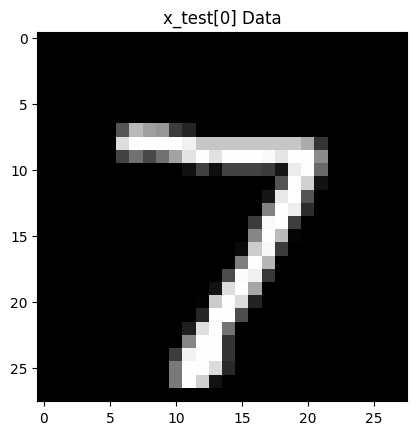

In [14]:
# Preparing Data
test_index = 0;
plt.title(f"x_test[{test_index}] Data");
plt.imshow(x_test[test_index], cmap="gray");
print(x_test.shape);


# Testing Autoencoder

In [15]:
#Testing with first data: x_test[0]--> which is number "7" as input
AE_out = Autoencoder.predict([ x_test[test_index].reshape(-1, 28, 28) ]);
print(AE_out.shape);

1/1 [==============================] - 0s 35ms/step
(1, 28, 28)


(28, 28)


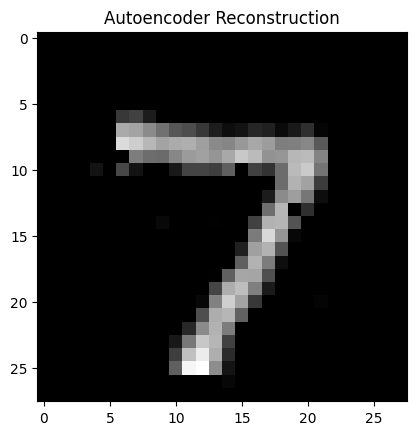

In [18]:
# Visualizing Autoencoder test result

# The output of the Autoencoder_model is re-constructed image from latent data:
image1 = AE_out[test_index];
print(AE_out[test_index].shape);
plt.title("Autoencoder Reconstruction");
plt.imshow(image1, cmap ='gray');

# Observe the image is very close to input, but with some dead pixels:
# Some data-loss in compression, hence reconstruction from latent data have losses.
# Still i/p itself can be cropped to compress even more--since corners are unecessary.
# TRY: taking more epochs = 50?

In [11]:
# Testing Encoder_Model

# When the Autoencoder_model is trained Encoder_Model is also trained.
# The ouput layer of encoder is the latent data, hence compressesed.
eetest = Encoder.predict([ x_test[0].reshape(-1, 28, 28) ]);
print(eetest.shape);

1/1 [==============================] - 0s 71ms/step
(1, 64)


# **Latent Space Data**

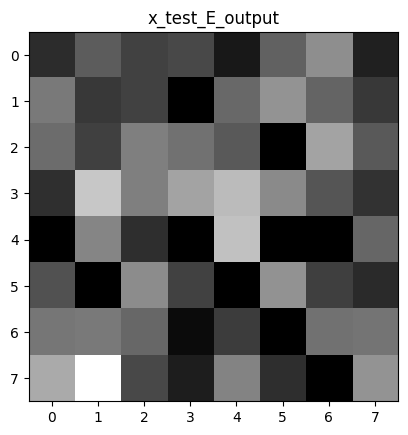

In [ ]:
# Encoder ouput is not reshaped into an image!
# output-->(1,64):vecotr with 64 data in a column
# reshape-->(8,8): 8*8=64--> image representation
plt.title("Latent Space output");
plt.imshow(eetest.reshape(8,8), cmap ="gray");

# This image need to make sense and as long as machine is able to sucessfully
# read and reconstruct the data from this compression.
# We could make a placeholder for decoder_model and explicility talk about
# decoder behaviour or use this latent data as input for different model.